In [1]:
import numpy as np
import landlab
from landlab import RasterModelGrid
from landlab.io import read_esri_ascii, write_esri_ascii
from landlab.plot.imshow import imshow_grid
import matplotlib.pyplot as plt

# sums up cell areas or given runoff volume along the flow directions
from landlab.components import FlowAccumulator
# fills depressions along the flow path
from landlab.components import DepressionFinderAndRouter
# reports drainage area or flow volume of a grid
from landlab.components.flow_accum import find_drainage_area_and_discharge

from landlab.utils import watershed

In [2]:
# KID-13 wet season year 1
(mg_k13_20201109_sfm,z_k13_20201109_sfm) = read_esri_ascii("k13/wsyr1/k13_20201109_sfm.asc", \
    name='topographic__elevation')
(mg_k13_20210208_sfm,z_k13_20210208_sfm) = read_esri_ascii("k13/wsyr1/k13_20210208_sfm.asc", \
    name='topographic__elevation')
(mg_k13_20210406_sfm,z_k13_20210406_sfm) = read_esri_ascii("k13/wsyr1/k13_20210406_sfm.asc", \
    name='topographic__elevation')
(mg_k13_20210513_sfm,z_k13_20210513_sfm) = read_esri_ascii("k13/wsyr1/k13_20210513_sfm.asc", \
    name='topographic__elevation')


# KID-13 dry season year 1
(mg_k13_20210604_sfm,z_k13_20210604_sfm) = read_esri_ascii("k13/dsyr1/k13_20210604_sfm.asc", \
    name='topographic__elevation')
(mg_k13_20210819_sfm,z_k13_20210819_sfm) = read_esri_ascii("k13/dsyr1/k13_20210819_sfm.asc", \
    name='topographic__elevation')
(mg_k13_20210913_sfm,z_k13_20210913_sfm) = read_esri_ascii("k13/dsyr1/k13_20210913_sfm.asc", \
    name='topographic__elevation')


# KID-13 wet season year 2
(mg_k13_20211007_sfm,z_k13_20211007_sfm) = read_esri_ascii("k13/wsyr2/k13_20211007_sfm.asc", \
    name='topographic__elevation')
(mg_k13_20220208_sfm,z_k13_20220208_sfm) = read_esri_ascii("k13/wsyr2/k13_20220208_sfm.asc", \
    name='topographic__elevation')
(mg_k13_20220503_sfm,z_k13_20220503_sfm) = read_esri_ascii("k13/wsyr2/k13_20220503_sfm.asc", \
    name='topographic__elevation')
(mg_k13_20220531_sfm,z_k13_20220531_sfm) = read_esri_ascii("k13/wsyr2/k13_20220531_sfm.asc", \
    name='topographic__elevation')

In [3]:
mg_k13_20201109_sfm.status_at_node[z_k13_20201109_sfm == -9999] = mg_k13_20201109_sfm.BC_NODE_IS_FIXED_VALUE
mg_k13_20210208_sfm.status_at_node[z_k13_20210208_sfm == -9999] = mg_k13_20210208_sfm.BC_NODE_IS_FIXED_VALUE
mg_k13_20210406_sfm.status_at_node[z_k13_20210406_sfm == -9999] = mg_k13_20210406_sfm.BC_NODE_IS_FIXED_VALUE
mg_k13_20210513_sfm.status_at_node[z_k13_20210513_sfm == -9999] = mg_k13_20210513_sfm.BC_NODE_IS_FIXED_VALUE

mg_k13_20210604_sfm.status_at_node[z_k13_20210604_sfm == -9999] = mg_k13_20210604_sfm.BC_NODE_IS_FIXED_VALUE
mg_k13_20210819_sfm.status_at_node[z_k13_20210819_sfm == -9999] = mg_k13_20210819_sfm.BC_NODE_IS_FIXED_VALUE
mg_k13_20210913_sfm.status_at_node[z_k13_20210913_sfm == -9999] = mg_k13_20210913_sfm.BC_NODE_IS_FIXED_VALUE

mg_k13_20211007_sfm.status_at_node[z_k13_20211007_sfm == -9999] = mg_k13_20211007_sfm.BC_NODE_IS_FIXED_VALUE
mg_k13_20220208_sfm.status_at_node[z_k13_20220208_sfm == -9999] = mg_k13_20220208_sfm.BC_NODE_IS_FIXED_VALUE
mg_k13_20220503_sfm.status_at_node[z_k13_20220503_sfm == -9999] = mg_k13_20220503_sfm.BC_NODE_IS_FIXED_VALUE
mg_k13_20220531_sfm.status_at_node[z_k13_20220531_sfm == -9999] = mg_k13_20220531_sfm.BC_NODE_IS_FIXED_VALUE

In [4]:
fa_k13_20201109_sfm = FlowAccumulator(mg_k13_20201109_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_k13_20210208_sfm = FlowAccumulator(mg_k13_20210208_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')                     
fa_k13_20210406_sfm = FlowAccumulator(mg_k13_20210406_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_k13_20210513_sfm = FlowAccumulator(mg_k13_20210513_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')




fa_k13_20210604_sfm = FlowAccumulator(mg_k13_20210604_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_k13_20210819_sfm = FlowAccumulator(mg_k13_20210819_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_k13_20210913_sfm = FlowAccumulator(mg_k13_20210913_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')



fa_k13_20211007_sfm = FlowAccumulator(mg_k13_20211007_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_k13_20220208_sfm = FlowAccumulator(mg_k13_20220208_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_k13_20220503_sfm = FlowAccumulator(mg_k13_20220503_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')
fa_k13_20220531_sfm = FlowAccumulator(mg_k13_20220531_sfm,
                     surface='topographic__elevation',
                     flow_director='FlowDirectorD8',
                     runoff_rate=0.01, # suppose there is 1 cm runoff generated in all grid cells
                     depression_finder='DepressionFinderAndRouter')

In [5]:
(da_k13_20201109_sfm, discharge_k13_20201109_sfm) = fa_k13_20201109_sfm.accumulate_flow()
(da_k13_20210208_sfm, discharge_k13_20210208_sfm) = fa_k13_20210208_sfm.accumulate_flow()
(da_k13_20210406_sfm, discharge_k13_20210406_sfm) = fa_k13_20210406_sfm.accumulate_flow()
(da_k13_20210513_sfm, discharge_k13_20210513_sfm) = fa_k13_20210513_sfm.accumulate_flow()

(da_k13_20210604_sfm, discharge_k13_20210604_sfm) = fa_k13_20210604_sfm.accumulate_flow()
(da_k13_20210819_sfm, discharge_k13_20210819_sfm) = fa_k13_20210819_sfm.accumulate_flow()
(da_k13_20210913_sfm, discharge_k13_20210913_sfm) = fa_k13_20210913_sfm.accumulate_flow()

(da_k13_20211007_sfm, discharge_k13_20211007_sfm) = fa_k13_20211007_sfm.accumulate_flow()
(da_k13_20220208_sfm, discharge_k13_20220208_sfm) = fa_k13_20220208_sfm.accumulate_flow()
(da_k13_20220503_sfm, discharge_k13_20220503_sfm) = fa_k13_20220503_sfm.accumulate_flow()
(da_k13_20220531_sfm, discharge_k13_20220531_sfm) = fa_k13_20220531_sfm.accumulate_flow()

In [6]:
mg_k13_20201109_sfm.at_node['drainage_area'][mg_k13_20201109_sfm.status_at_node==mg_k13_20201109_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_k13_20210208_sfm.at_node['drainage_area'][mg_k13_20210208_sfm.status_at_node==mg_k13_20210208_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_k13_20210406_sfm.at_node['drainage_area'][mg_k13_20210406_sfm.status_at_node==mg_k13_20210406_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_k13_20210513_sfm.at_node['drainage_area'][mg_k13_20210513_sfm.status_at_node==mg_k13_20210513_sfm.BC_NODE_IS_FIXED_VALUE] = 0

mg_k13_20210604_sfm.at_node['drainage_area'][mg_k13_20210604_sfm.status_at_node==mg_k13_20210604_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_k13_20210819_sfm.at_node['drainage_area'][mg_k13_20210819_sfm.status_at_node==mg_k13_20210819_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_k13_20210913_sfm.at_node['drainage_area'][mg_k13_20210913_sfm.status_at_node==mg_k13_20210913_sfm.BC_NODE_IS_FIXED_VALUE] = 0

mg_k13_20211007_sfm.at_node['drainage_area'][mg_k13_20211007_sfm.status_at_node==mg_k13_20211007_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_k13_20220208_sfm.at_node['drainage_area'][mg_k13_20220208_sfm.status_at_node==mg_k13_20220208_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_k13_20220503_sfm.at_node['drainage_area'][mg_k13_20220503_sfm.status_at_node==mg_k13_20220503_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_k13_20220531_sfm.at_node['drainage_area'][mg_k13_20220531_sfm.status_at_node==mg_k13_20220531_sfm.BC_NODE_IS_FIXED_VALUE] = 0

In [7]:
mg_k13_20201109_sfm.at_node['surface_water__discharge'][mg_k13_20201109_sfm.status_at_node==mg_k13_20201109_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_k13_20210208_sfm.at_node['surface_water__discharge'][mg_k13_20210208_sfm.status_at_node==mg_k13_20210208_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_k13_20210406_sfm.at_node['surface_water__discharge'][mg_k13_20210406_sfm.status_at_node==mg_k13_20210406_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_k13_20210513_sfm.at_node['surface_water__discharge'][mg_k13_20210513_sfm.status_at_node==mg_k13_20210513_sfm.BC_NODE_IS_FIXED_VALUE] = 0

mg_k13_20210604_sfm.at_node['surface_water__discharge'][mg_k13_20210604_sfm.status_at_node==mg_k13_20210604_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_k13_20210819_sfm.at_node['surface_water__discharge'][mg_k13_20210819_sfm.status_at_node==mg_k13_20210819_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_k13_20210913_sfm.at_node['surface_water__discharge'][mg_k13_20210913_sfm.status_at_node==mg_k13_20210913_sfm.BC_NODE_IS_FIXED_VALUE] = 0

mg_k13_20211007_sfm.at_node['surface_water__discharge'][mg_k13_20211007_sfm.status_at_node==mg_k13_20211007_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_k13_20220208_sfm.at_node['surface_water__discharge'][mg_k13_20220208_sfm.status_at_node==mg_k13_20220208_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_k13_20220503_sfm.at_node['surface_water__discharge'][mg_k13_20220503_sfm.status_at_node==mg_k13_20220503_sfm.BC_NODE_IS_FIXED_VALUE] = 0
mg_k13_20220531_sfm.at_node['surface_water__discharge'][mg_k13_20220531_sfm.status_at_node==mg_k13_20220531_sfm.BC_NODE_IS_FIXED_VALUE] = 0

In [8]:
# plt.figure(figsize=(5,9))
# imshow_grid(mg_m14_20201203_sfm,'surface_water__discharge', plot_name = 'M14\n2020-12-03\nSfM', \
#     cmap='Blues', vmin=0, vmax=0.2, allow_colorbar=False)
# plt.show();

# plt.figure(figsize=(5,9))
# imshow_grid(mg_m14_20210224_sfm,'surface_water__discharge', plot_name = 'M14\n2021-02-24\nSfM', \
#     cmap='Blues', vmin=0, vmax=0.2, colorbar_label='Discharge')
# plt.show();

# plt.figure(figsize=(5,9))
# imshow_grid(mg_m14_20220324_sfm,'surface_water__discharge', plot_name = 'M14\n2022-03-24\nSfM', \
#     cmap='Blues', vmin=0, vmax=0.2, allow_colorbar=False)
# plt.show();

# plt.figure(figsize=(5,9))
# imshow_grid(mg_m14_20220411_sfm,'surface_water__discharge', plot_name = 'M14\n2022-04-11\nSfM', \
#     cmap='Blues', vmin=0, vmax=0.2, allow_colorbar=False)
# plt.show();

# plt.figure(figsize=(5,9))
# imshow_grid(mg_m14_20220428_sfm,'surface_water__discharge', plot_name = 'M14\n2022-04-28\nSfM', \
#     cmap='Blues', vmin=0, vmax=0.2, allow_colorbar=False)
# plt.show();

# plt.figure(figsize=(5,9))
# imshow_grid(mg_m14_20220601_sfm,'surface_water__discharge', plot_name = 'M14\n2022-06-01\nSfM', \
#     cmap='Blues', vmin=0, vmax=0.2, colorbar_label='Discharge')
# plt.show();

## KID-13 WSYR1

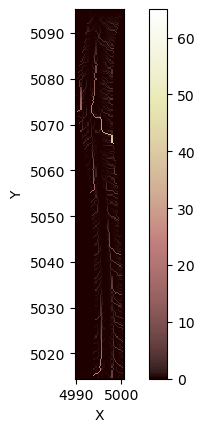

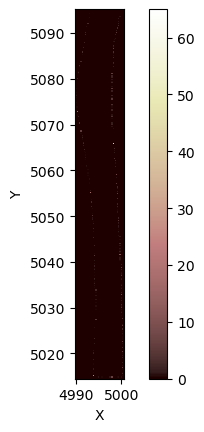

In [9]:
area = mg_k13_20201109_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_k13_20201109_sfm.node_has_boundary_neighbor(mg_k13_20201109_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_k13_20201109_sfm.imshow(mg_k13_20201109_sfm.at_node['drainage_area'], vmin=0, vmax=65)
plt.show()

mask = np.zeros(len(mg_k13_20201109_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_k13_20201109_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
imshow_grid(mg_k13_20201109_sfm, 'boundary_drainage', vmin=0, vmax=65)
plt.show()

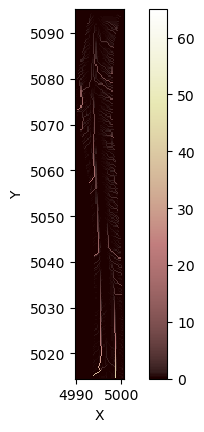

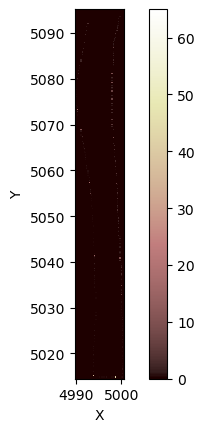

In [10]:
area = mg_k13_20210208_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_k13_20210208_sfm.node_has_boundary_neighbor(mg_k13_20210208_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_k13_20210208_sfm.imshow(mg_k13_20210208_sfm.at_node['drainage_area'], vmin=0, vmax=65)
plt.show()

mask = np.zeros(len(mg_k13_20210208_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_k13_20210208_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
imshow_grid(mg_k13_20210208_sfm, 'boundary_drainage', vmin=0, vmax=65)
plt.show()

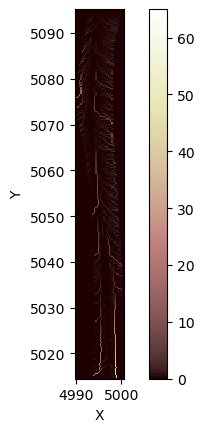

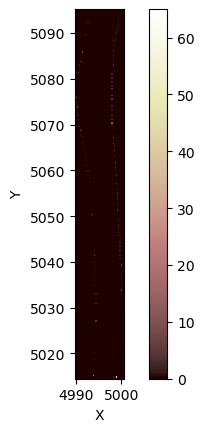

In [11]:
area = mg_k13_20210406_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_k13_20210406_sfm.node_has_boundary_neighbor(mg_k13_20210406_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_k13_20210406_sfm.imshow(mg_k13_20210406_sfm.at_node['drainage_area'], vmin=0, vmax=65)
plt.show()

mask = np.zeros(len(mg_k13_20210406_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_k13_20210406_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
imshow_grid(mg_k13_20210406_sfm, 'boundary_drainage', vmin=0, vmax=65)
plt.show()

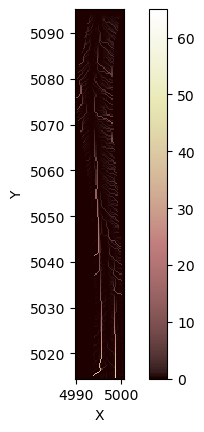

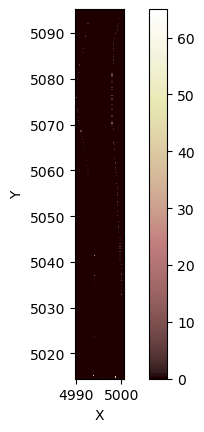

In [12]:
area = mg_k13_20210513_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_k13_20210513_sfm.node_has_boundary_neighbor(mg_k13_20210513_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_k13_20210513_sfm.imshow(mg_k13_20210513_sfm.at_node['drainage_area'], vmin=0, vmax=65)
plt.show()

mask = np.zeros(len(mg_k13_20210513_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_k13_20210513_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
imshow_grid(mg_k13_20210513_sfm, 'boundary_drainage', vmin=0, vmax=65)
plt.show()

In [13]:
write_esri_ascii('k13/wsyr1/out/mg_k13_20201109_sfm_drainage.asc',mg_k13_20201109_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('k13/wsyr1/out/mg_k13_20210208_sfm_drainage.asc',mg_k13_20210208_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('k13/wsyr1/out/mg_k13_20210406_sfm_drainage.asc',mg_k13_20210406_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('k13/wsyr1/out/mg_k13_20210513_sfm_drainage.asc',mg_k13_20210513_sfm,names='boundary_drainage',clobber=True)

write_esri_ascii('../micro_diff/data/dems/k13_results/wsyr1/out/mg_k13_20201109_sfm_drainage.asc',mg_k13_20201109_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('../micro_diff/data/dems/k13_results/wsyr1/out/mg_k13_20210208_sfm_drainage.asc',mg_k13_20210208_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('../micro_diff/data/dems/k13_results/wsyr1/out/mg_k13_20210406_sfm_drainage.asc',mg_k13_20210406_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('../micro_diff/data/dems/k13_results/wsyr1/out/mg_k13_20210513_sfm_drainage.asc',mg_k13_20210513_sfm,names='boundary_drainage',clobber=True)

['../micro_diff/data/dems/k13_results/wsyr1/out/mg_k13_20210513_sfm_drainage.asc']

## KID-13 DSYR1

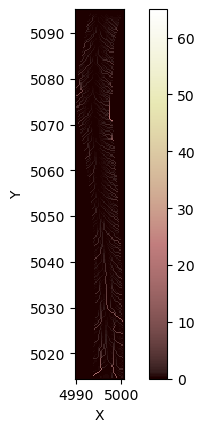

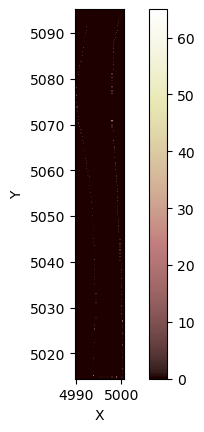

In [14]:
area = mg_k13_20210604_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_k13_20210604_sfm.node_has_boundary_neighbor(mg_k13_20210604_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_k13_20210604_sfm.imshow(mg_k13_20210604_sfm.at_node['drainage_area'], vmin=0, vmax=65)
plt.show()

mask = np.zeros(len(mg_k13_20210604_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_k13_20210604_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
imshow_grid(mg_k13_20210604_sfm, 'boundary_drainage', vmin=0, vmax=65)
plt.show()

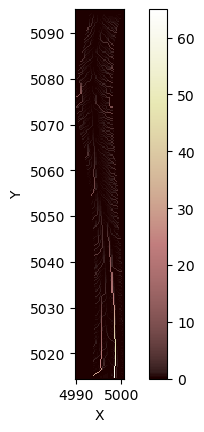

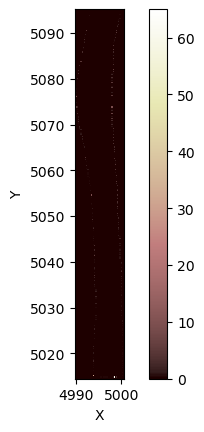

In [15]:
area = mg_k13_20210819_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_k13_20210819_sfm.node_has_boundary_neighbor(mg_k13_20210819_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_k13_20210819_sfm.imshow(mg_k13_20210819_sfm.at_node['drainage_area'], vmin=0, vmax=65)
plt.show()

mask = np.zeros(len(mg_k13_20210819_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_k13_20210819_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
imshow_grid(mg_k13_20210819_sfm, 'boundary_drainage', vmin=0, vmax=65)
plt.show()

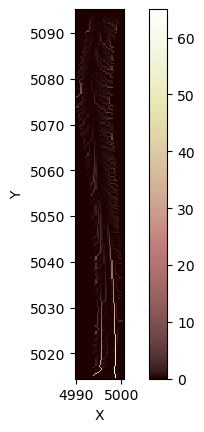

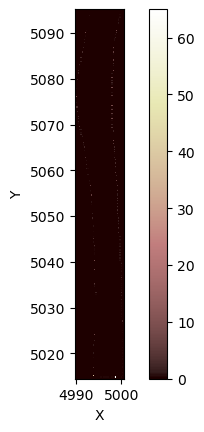

In [16]:
area = mg_k13_20210913_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_k13_20210913_sfm.node_has_boundary_neighbor(mg_k13_20210913_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_k13_20210913_sfm.imshow(mg_k13_20210913_sfm.at_node['drainage_area'], vmin=0, vmax=65)
plt.show()

mask = np.zeros(len(mg_k13_20210913_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_k13_20210913_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
imshow_grid(mg_k13_20210913_sfm, 'boundary_drainage', vmin=0, vmax=65)
plt.show()

In [17]:
write_esri_ascii('k13/dsyr1/out/mg_k13_20210604_sfm_drainage.asc',mg_k13_20210604_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('k13/dsyr1/out/mg_k13_20210819_sfm_drainage.asc',mg_k13_20210819_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('k13/dsyr1/out/mg_k13_20210913_sfm_drainage.asc',mg_k13_20210913_sfm,names='boundary_drainage',clobber=True)

write_esri_ascii('../micro_diff/data/dems/k13_results/dsyr1/out/mg_k13_20210604_sfm_drainage.asc',mg_k13_20210604_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('../micro_diff/data/dems/k13_results/dsyr1/out/mg_k13_20210819_sfm_drainage.asc',mg_k13_20210819_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('../micro_diff/data/dems/k13_results/dsyr1/out/mg_k13_20210913_sfm_drainage.asc',mg_k13_20210913_sfm,names='boundary_drainage',clobber=True)

['../micro_diff/data/dems/k13_results/dsyr1/out/mg_k13_20210913_sfm_drainage.asc']

## KID-13 WSYR2

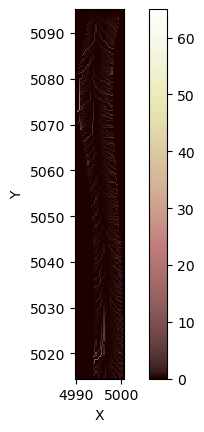

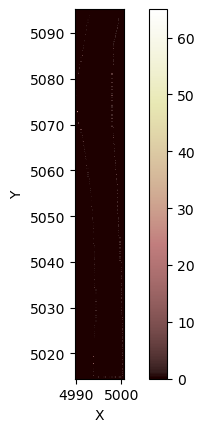

In [18]:
area = mg_k13_20211007_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_k13_20211007_sfm.node_has_boundary_neighbor(mg_k13_20211007_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_k13_20211007_sfm.imshow(mg_k13_20211007_sfm.at_node['drainage_area'], vmin=0, vmax=65)
plt.show()

mask = np.zeros(len(mg_k13_20211007_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_k13_20211007_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
imshow_grid(mg_k13_20211007_sfm, 'boundary_drainage', vmin=0, vmax=65)
plt.show()

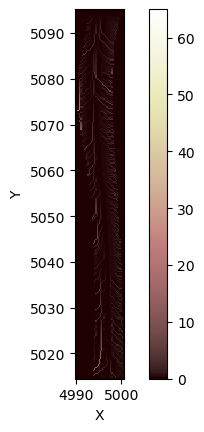

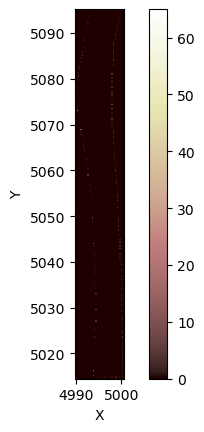

In [19]:
area = mg_k13_20220208_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_k13_20220208_sfm.node_has_boundary_neighbor(mg_k13_20220208_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_k13_20220208_sfm.imshow(mg_k13_20220208_sfm.at_node['drainage_area'], vmin=0, vmax=65)
plt.show()

mask = np.zeros(len(mg_k13_20220208_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_k13_20220208_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
imshow_grid(mg_k13_20220208_sfm, 'boundary_drainage', vmin=0, vmax=65)
plt.show()

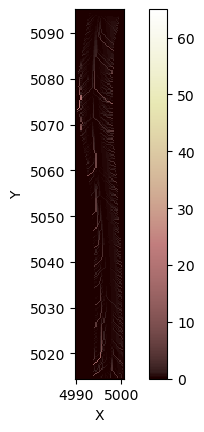

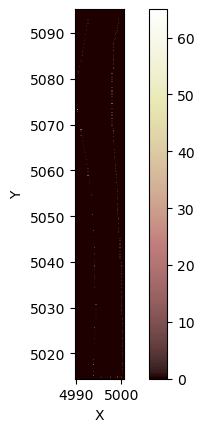

In [20]:
area = mg_k13_20220503_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_k13_20220503_sfm.node_has_boundary_neighbor(mg_k13_20220503_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_k13_20220503_sfm.imshow(mg_k13_20220503_sfm.at_node['drainage_area'], vmin=0, vmax=65)
plt.show()

mask = np.zeros(len(mg_k13_20220503_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_k13_20220503_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
imshow_grid(mg_k13_20220503_sfm, 'boundary_drainage', vmin=0, vmax=65)
plt.show()

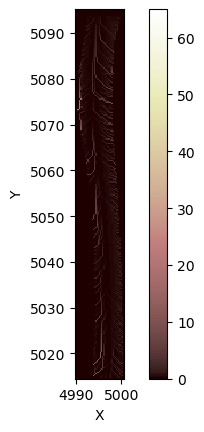

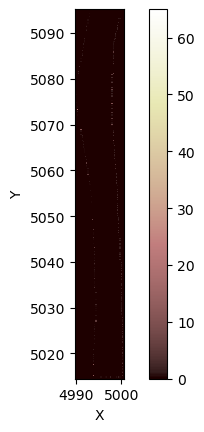

In [21]:
area = mg_k13_20220531_sfm.at_node['drainage_area']
is_drainage_boundary = np.logical_and((area>0), (mg_k13_20220531_sfm.node_has_boundary_neighbor(mg_k13_20220531_sfm.nodes)==True).flatten())
boundary_drainage_area=area[is_drainage_boundary]
mg_k13_20220531_sfm.imshow(mg_k13_20220531_sfm.at_node['drainage_area'], vmin=0, vmax=65)
plt.show()

mask = np.zeros(len(mg_k13_20220531_sfm.at_node['topographic__elevation'])) 
mask[np.where(is_drainage_boundary)] = boundary_drainage_area
mg_k13_20220531_sfm.add_field("boundary_drainage", mask, at='node', clobber=True)
imshow_grid(mg_k13_20220531_sfm, 'boundary_drainage', vmin=0, vmax=65)
plt.show()

In [22]:
write_esri_ascii('k13/wsyr2/out/mg_k13_20211007_sfm_drainage.asc',mg_k13_20211007_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('k13/wsyr2/out/mg_k13_20220208_sfm_drainage.asc',mg_k13_20220208_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('k13/wsyr2/out/mg_k13_20220503_sfm_drainage.asc',mg_k13_20220503_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('k13/wsyr2/out/mg_k13_20220531_sfm_drainage.asc',mg_k13_20220531_sfm,names='boundary_drainage',clobber=True)

write_esri_ascii('../micro_diff/data/dems/k13_results/wsyr2/out/mg_k13_20211007_sfm_drainage.asc',mg_k13_20211007_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('../micro_diff/data/dems/k13_results/wsyr2/out/mg_k13_20220208_sfm_drainage.asc',mg_k13_20220208_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('../micro_diff/data/dems/k13_results/wsyr2/out/mg_k13_20220503_sfm_drainage.asc',mg_k13_20220503_sfm,names='boundary_drainage',clobber=True)
write_esri_ascii('../micro_diff/data/dems/k13_results/wsyr2/out/mg_k13_20220531_sfm_drainage.asc',mg_k13_20220531_sfm,names='boundary_drainage',clobber=True)

['../micro_diff/data/dems/k13_results/wsyr2/out/mg_k13_20220531_sfm_drainage.asc']